# 2603655_DataAcquisition

## Week1 20240806

---
* Author:  [Yuttapong Mahasittiwat](mailto:khala1391@gmail.com)
* Technologist | Data Modeler | Data Analyst
* [YouTube](https://www.youtube.com/khala1391)
* [LinkedIn](https://www.linkedin.com/in/yuttapong-m/)
---

In [4]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
print("pandas version :",pd.__version__)
print("numpy version :",np.__version__)
print("matplotlib version :",mpl.__version__)
print("seaborn version :",sns.__version__)

pandas version : 2.2.1
numpy version : 1.26.4
matplotlib version : 3.8.4
seaborn version : 0.13.2


In [5]:
df = pd.read_csv('data/thaiglobal_logistics_data_rev2.csv')
df.info()
# df.head()
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   shipment_id              100000 non-null  int64  
 1   date                     100000 non-null  object 
 2   origin                   100000 non-null  object 
 3   destination              100000 non-null  object 
 4   distance_km              100000 non-null  float64
 5   weight_kg                100000 non-null  float64
 6   vehicle_type             100000 non-null  object 
 7   vehicle_age_years        100000 non-null  float64
 8   driver_id                100000 non-null  int64  
 9   customer_id              100000 non-null  int64  
 10  product_type             100000 non-null  object 
 11  delivery_status          100000 non-null  object 
 12  delay_hours              100000 non-null  float64
 13  transport_cost           100000 non-null  float64
 14  reven

### data slicing

In [6]:
# a = df['origin']
# b = df[['origin']]
# print(a.head())
# print(b.head())

## a = df['origin','revenue']
## print(a.head())
# b = df[['origin','revenue']]
# print(b.head())

b = df[['origin','revenue']].copy()
print(b.head())

    origin   revenue
0  Bangkok   7678.96
1  Bangkok    631.55
2  Pattaya  40442.32
3   Phuket   6956.18
4  Pattaya  16015.77


In [7]:
# df['delivery_status'].value_counts()
# ontime_delivery = df[df['delivery_status'] == 'On Time']
# ontime_delivery.info()

mask = df['delivery_status'] == 'On Time'
a = df[['origin','revenue']].copy()
a['on_time'] = mask
print(a.head())
a.info()

ontime_delivery = df[mask]
ontime_delivery.info()

    origin   revenue  on_time
0  Bangkok   7678.96     True
1  Bangkok    631.55    False
2  Pattaya  40442.32    False
3   Phuket   6956.18     True
4  Pattaya  16015.77     True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   origin   100000 non-null  object 
 1   revenue  100000 non-null  float64
 2   on_time  100000 non-null  bool   
dtypes: bool(1), float64(1), object(1)
memory usage: 1.6+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 79946 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   shipment_id              79946 non-null  int64         
 1   date                     79946 non-null  datetime64[ns]
 2   origin                   79946 non-null  object        
 3   destination              79946 non-null  

In [8]:
# mask1 = df['delivery_status'] == 'On Time'
# mask2 = df['revenue'] > df['revenue'].quantile(0.75)
# a = df[mask1 & mask2]
# print(a.shape)
# a.head()

a = df[(df['delivery_status'] == 'On Time') & (df['revenue'] > df['revenue'].quantile(0.75))]
print(a.shape)
a.head()

(19919, 21)


,shipment_id,date,origin,destination,distance_km,weight_kg,vehicle_type,vehicle_age_years,driver_id,customer_id,...,delivery_status,delay_hours,transport_cost,revenue,customer_satisfaction,fuel_consumption_liters,maintenance_cost,month,estimated_delivery_days,actual_delivery_days
8,9,2022-05-02,Chiang Mai,Tokyo,8849.05,332.70,Airplane,7.2,155,5435,...,On Time,0.0,15307.48,22501.27,4.46,2212.26,2973.88,5,17.8,17.8
15,16,2022-04-10,Bangkok,Dubai,9534.71,759.74,Truck,3.5,104,3430,...,On Time,0.0,17773.18,23223.99,4.87,1589.12,1401.19,4,19.2,19.2
16,17,2023-10-26,Bangkok,Tokyo,7598.83,411.75,Van,8.1,435,2332,...,On Time,0.0,20987.39,25208.33,4.89,949.85,1639.26,10,15.2,15.2
17,18,2022-05-11,Bangkok,Sydney,6783.54,403.26,Van,0.8,57,8070,...,On Time,0.0,21468.70,26913.08,4.21,847.94,523.98,5,12.5,12.5
27,28,2023-04-05,Khon Kaen,Tokyo,3479.57,1238.71,Airplane,3.0,143,577,...,On Time,0.0,17481.51,24686.61,4.89,869.89,650.91,4,6.9,6.9


### Dictionary in Dictionary

In [9]:
import json

# df[df['vehicle_type'] == 'Truck']['distance_km'].mean()

# dict / list comprehension
avg_distance_vehicle = {vtype: df[df['vehicle_type'] == vtype]['distance_km'].mean()
                               for vtype in df['vehicle_type'].unique()}
print(avg_distance_vehicle)

{'Ship': 5069.631199695975, 'Truck': 5051.043256590863, 'Airplane': 5057.025628270176, 'Van': 5046.9435573027395}


In [10]:
# route_summary = dict()
route_summary = {}
for origin in df['origin'].unique():
  for destination in df['destination'].unique():
    # key = f'{origin} - {destination}'
    key = '{0} - {1}'.format(origin,destination)
    # summary = dict()
    summary = {}
    summary['avg_cost'] = df[(df['origin'] == origin) & (df['destination'] == destination)]['transport_cost'].mean()
    summary['avg_revenue'] = df[(df['origin'] == origin) & (df['destination'] == destination)]['revenue'].mean()
    route_summary[key] = summary
# print(route_summary)
display(route_summary)

{'Bangkok - Tokyo': {'avg_cost': 12147.340389861196,
  'avg_revenue': 14997.5643995172},
 'Bangkok - New York': {'avg_cost': 11710.611782723281,
  'avg_revenue': 14510.723121522695},
 'Bangkok - Sydney': {'avg_cost': 12000.516856193353,
  'avg_revenue': 14902.151045317221},
 'Bangkok - Dubai': {'avg_cost': 11984.114799396682,
  'avg_revenue': 14875.25566515837},
 'Bangkok - Singapore': {'avg_cost': 11908.647147805315,
  'avg_revenue': 14696.449214690952},
 'Bangkok - London': {'avg_cost': 11854.573618297485,
  'avg_revenue': 14709.241841866104},
 'Pattaya - Tokyo': {'avg_cost': 11874.067309488619,
  'avg_revenue': 14719.038167307126},
 'Pattaya - New York': {'avg_cost': 11818.997662752183,
  'avg_revenue': 14629.654170430593},
 'Pattaya - Sydney': {'avg_cost': 12012.773601938805,
  'avg_revenue': 14854.12924265374},
 'Pattaya - Dubai': {'avg_cost': 12050.34029984917,
  'avg_revenue': 14884.964558069383},
 'Pattaya - Singapore': {'avg_cost': 12125.839289417505,
  'avg_revenue': 15006.20

In [12]:
# route_summary = dict()
route_summary = dict()
for origin in df['origin'].unique():
  for destination in df['destination'].unique():
    # key = f'{origin} - {destination}'
    key = '{0} - {1}'.format(origin,destination)
    # summary = dict()
    summary = dict()
    summary['avg_cost'] = df[(df['origin'] == origin) & (df['destination'] == destination)]['transport_cost'].mean()
    summary['avg_revenue'] = df[(df['origin'] == origin) & (df['destination'] == destination)]['revenue'].mean()
    route_summary[key] = summary
# print(route_summary)
display(route_summary)

{'Bangkok - Tokyo': {'avg_cost': 12147.340389861196,
  'avg_revenue': 14997.5643995172},
 'Bangkok - New York': {'avg_cost': 11710.611782723281,
  'avg_revenue': 14510.723121522695},
 'Bangkok - Sydney': {'avg_cost': 12000.516856193353,
  'avg_revenue': 14902.151045317221},
 'Bangkok - Dubai': {'avg_cost': 11984.114799396682,
  'avg_revenue': 14875.25566515837},
 'Bangkok - Singapore': {'avg_cost': 11908.647147805315,
  'avg_revenue': 14696.449214690952},
 'Bangkok - London': {'avg_cost': 11854.573618297485,
  'avg_revenue': 14709.241841866104},
 'Pattaya - Tokyo': {'avg_cost': 11874.067309488619,
  'avg_revenue': 14719.038167307126},
 'Pattaya - New York': {'avg_cost': 11818.997662752183,
  'avg_revenue': 14629.654170430593},
 'Pattaya - Sydney': {'avg_cost': 12012.773601938805,
  'avg_revenue': 14854.12924265374},
 'Pattaya - Dubai': {'avg_cost': 12050.34029984917,
  'avg_revenue': 14884.964558069383},
 'Pattaya - Singapore': {'avg_cost': 12125.839289417505,
  'avg_revenue': 15006.20

In [13]:
print(json.dumps(route_summary,indent=2))

{
  "Bangkok - Tokyo": {
    "avg_cost": 12147.340389861196,
    "avg_revenue": 14997.5643995172
  },
  "Bangkok - New York": {
    "avg_cost": 11710.611782723281,
    "avg_revenue": 14510.723121522695
  },
  "Bangkok - Sydney": {
    "avg_cost": 12000.516856193353,
    "avg_revenue": 14902.151045317221
  },
  "Bangkok - Dubai": {
    "avg_cost": 11984.114799396682,
    "avg_revenue": 14875.25566515837
  },
  "Bangkok - Singapore": {
    "avg_cost": 11908.647147805315,
    "avg_revenue": 14696.449214690952
  },
  "Bangkok - London": {
    "avg_cost": 11854.573618297485,
    "avg_revenue": 14709.241841866104
  },
  "Pattaya - Tokyo": {
    "avg_cost": 11874.067309488619,
    "avg_revenue": 14719.038167307126
  },
  "Pattaya - New York": {
    "avg_cost": 11818.997662752183,
    "avg_revenue": 14629.654170430593
  },
  "Pattaya - Sydney": {
    "avg_cost": 12012.773601938805,
    "avg_revenue": 14854.12924265374
  },
  "Pattaya - Dubai": {
    "avg_cost": 12050.34029984917,
    "avg_reve

In [15]:
import pprint as pprint

In [16]:
pprint.pprint(route_summary)

{'Bangkok - Dubai': {'avg_cost': 11984.114799396682,
                     'avg_revenue': 14875.25566515837},
 'Bangkok - London': {'avg_cost': 11854.573618297485,
                      'avg_revenue': 14709.241841866104},
 'Bangkok - New York': {'avg_cost': 11710.611782723281,
                        'avg_revenue': 14510.723121522695},
 'Bangkok - Singapore': {'avg_cost': 11908.647147805315,
                         'avg_revenue': 14696.449214690952},
 'Bangkok - Sydney': {'avg_cost': 12000.516856193353,
                      'avg_revenue': 14902.151045317221},
 'Bangkok - Tokyo': {'avg_cost': 12147.340389861196,
                     'avg_revenue': 14997.5643995172},
 'Chiang Mai - Dubai': {'avg_cost': 11884.342582983822,
                        'avg_revenue': 14752.187264829241},
 'Chiang Mai - London': {'avg_cost': 11788.670579209369,
                         'avg_revenue': 14614.16575988287},
 'Chiang Mai - New York': {'avg_cost': 12043.066263517714,
                           'avg_r

### Dict comprehension

In [19]:
avg_distance_vehicle = {vtype: df[df['vehicle_type'] == vtype]['distance_km'].mean()
                               for vtype in df['vehicle_type'].unique()}
print(avg_distance_vehicle)

{'Ship': 5069.631199695975, 'Truck': 5051.043256590863, 'Airplane': 5057.025628270176, 'Van': 5046.9435573027395}


In [23]:
vtype_distance = df.groupby(by=['vehicle_type'])['distance_km'].mean()
print(vtype_distance)

vehicle_type
Airplane    5057.025628
Ship        5069.631200
Truck       5051.043257
Van         5046.943557
Name: distance_km, dtype: float64


In [25]:
vtype_measures = df.groupby(by=['vehicle_type']).agg(
                    {'distance_km':'mean',
                      'revenue':'sum',
                      'origin':pd.Series.mode}
                    )
print(vtype_measures)
print()

              distance_km       revenue      origin
vehicle_type                                       
Airplane      5057.025628  6.384085e+08     Bangkok
Ship          5069.631200  2.107299e+08  Chiang Mai
Truck         5051.043257  2.491020e+08   Khon Kaen
Van           5046.943557  3.772953e+08     Pattaya



In [27]:
vtype_measures.columns = ['avg_distance','total_revenue','most_freq_origin']
print(vtype_measures)

              avg_distance  total_revenue most_freq_origin
vehicle_type                                              
Airplane       5057.025628   6.384085e+08          Bangkok
Ship           5069.631200   2.107299e+08       Chiang Mai
Truck          5051.043257   2.491020e+08        Khon Kaen
Van            5046.943557   3.772953e+08          Pattaya


In [29]:
print(df['destination'].unique())
if 'Chula' in df['destination'].unique():
  print('Found')
else:
  print('Not Found')

['Tokyo' 'New York' 'Sydney' 'Dubai' 'Singapore' 'London']
Not Found


In [31]:
type(df['destination'].unique())

numpy.ndarray

In [33]:
set(df['destination'])

{'Dubai', 'London', 'New York', 'Singapore', 'Sydney', 'Tokyo'}

In [35]:
set_destination = set(df['destination'])
print(set_destination)

{'London', 'New York', 'Dubai', 'Tokyo', 'Singapore', 'Sydney'}


In [37]:
if 'Chula' in set_destination:
  print('Found')
else:
  print('Not Found')

set_origin = set(df['origin'])
print(set_origin.union(set_destination))

Not Found
{'London', 'New York', 'Phuket', 'Pattaya', 'Dubai', 'Bangkok', 'Tokyo', 'Singapore', 'Chiang Mai', 'Sydney', 'Khon Kaen'}


### Graphical analysis

<Axes: >

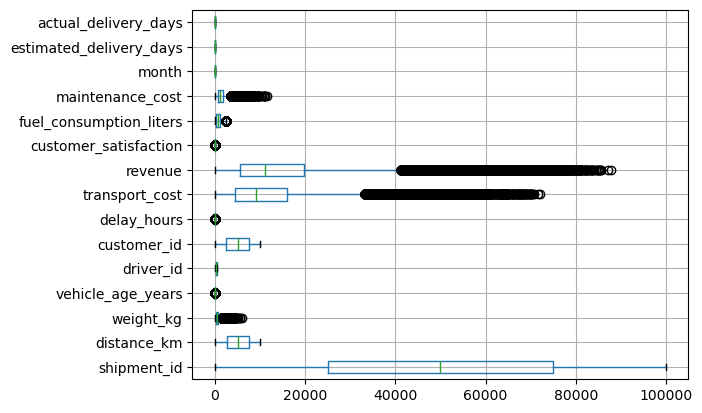

In [39]:
df.boxplot(vert=False)

In [40]:
df.plot(kind='box', by='delivery_status', column='customer_satisfaction')

customer_satisfaction    Axes(0.125,0.11;0.775x0.77)
dtype: object

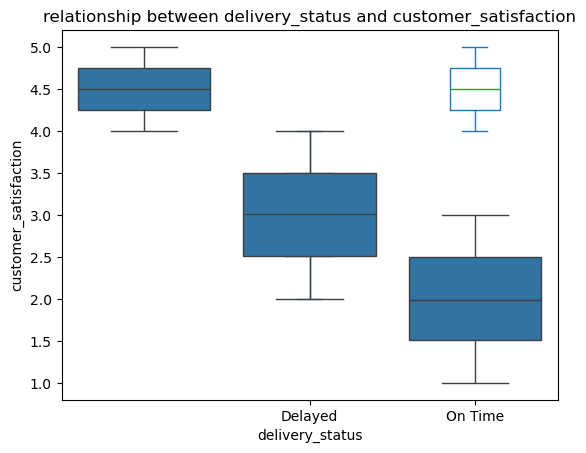

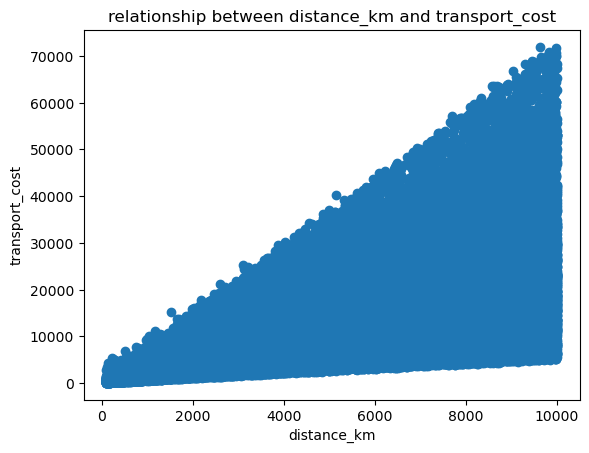

In [41]:
sns.boxplot(x='delivery_status',y='customer_satisfaction',data=df)
plt.title('relationship between delivery_status and customer_satisfaction')
plt.show()

plt.scatter(df['distance_km'],df['transport_cost'])
plt.title('relationship between distance_km and transport_cost')
plt.xlabel('distance_km')
plt.ylabel('transport_cost')
plt.show()

### New column by Apply()

In [42]:
def category_distance(d):
  if d < 1000:
    return 'short'
  elif d < 5000:
    return 'medium'
  else:
    return 'long'

df['distance_category'] = df['distance_km'].apply(category_distance)
print(df[['distance_km','distance_category']].head(10))
print(df[['distance_km','distance_category']].sample(10))

   distance_km distance_category
0      5161.83              long
1       375.85             short
2      7805.35              long
3      9111.63              long
4      9878.25              long
5      6725.04              long
6      4219.62            medium
7      5633.11              long
8      8849.05              long
9       809.42             short
       distance_km distance_category
17427      8903.30              long
47841       967.78             short
3896       4958.90            medium
30672      8886.89              long
85790      9668.85              long
11671      5368.66              long
15848       198.22             short
60735      9836.53              long
27631      2096.00            medium
71877      5523.97              long


In [43]:
df['profit'] = df.apply(lambda row: (row['revenue'] - row['transport_cost']),axis=1)
print(df[['revenue','transport_cost','profit']].head(10))

    revenue  transport_cost    profit
0   7678.96        5647.710  2031.250
1    631.55         481.220   150.330
2  40442.32       32154.670  8287.650
3   6956.18        5512.700  1443.480
4  16015.77       13187.820  2827.950
5   8593.52        8167.464   426.056
6  12205.43       10033.776  2171.654
7  18834.44       15558.040  3276.400
8  22501.27       15307.480  7193.790
9    991.59         669.210   322.380
